# ex_network_B


Design a 2D neural network of 1000 cells receiving geometric thalamic inputs

Define the stimulus as a geometric figures on a surface (e.g. an empty square, an empty triangle, etc).

The thalamo-cx connectivity is one-to-one.

Model of cells is free of choice.

Record and plot spikes, voltage and both the conductances.

In [1]:
# fileName

fileName = 'ex_network_B'

In [2]:
# libs

import pyNN.nest as sim
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt


/home/alberto-int/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'pynestkernel' does not match runtime version 3.7
  return f(*args, **kwds)


CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/home/alberto-int/anaconda3/lib/python3.7/site-packages/PyNN-0.9.5-py3.7.egg/pyNN/nest/__init__.py:53: UserWarning:Unable to install NEST extensions. Certain models may not be available.


In [3]:
# simulation settings

sim.setup(
        timestep=1, # [ms]
        min_delay=1, # [ms]
        max_delay=100) # [ms]

simtime = 1000 # [ms+]


/usr/lib/python3.5/dist-packages/nest/lib/hl_api_helper.py:127: UserWarning:
ResetNetwork is deprecated and will be removed in NEST 3.0.


In [4]:
# make the network

structure = {}
structure['2D'] = space.Grid2D(
                                aspect_ratio=1.0,
                                dx=1.0,
                                dy=1.0,
                                x0=0.0,
                                y0=0.0,
                                z=0,
                                fill_order='sequential', #'random'
                                rng=None,
                                )
sizePop = 900
cx = {}
v_init = np.random.uniform(low=-70, high=-60)
cx['tot'] = sim.Population(
                    sizePop,
                    sim.IF_cond_exp,
                    cellparams=sim.IF_cond_exp.default_parameters,
                    structure = structure['2D'],
                    initial_values = {'v': v_init},
                    label='cx'
                   )



NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


In [5]:
# set recording of state variables

cx['tot'].record(['spikes','v','gsyn_exc','gsyn_inh'])

In [6]:
# generate position of cells

structure['2D'].generate_positions(900)

array([[ 0.,  0.,  0., ..., 29., 29., 29.],
       [ 0.,  1.,  2., ..., 27., 28., 29.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
# make the spike times

spike_times = [[]]*sizePop

im = np.zeros((int(np.sqrt(sizePop)), int(np.sqrt(sizePop))))

traj = [[5, 5],
        [5, 6],
        [5, 7],
        [5, 8],
        [5, 9],
        [5, 10],
        [5, 11],
        [5, 12],
        [5, 13],
        [5, 14],
        [5, 15],
        [5, 16],
        [5, 17],
        [5, 18],
        [5, 19],
        [5, 20]]

 




In [8]:
for i in range(4,25):
    im[4,i] = 1
    
for i in range(4,25):
    im[i,25] = 1

for i in range(4, 25):
    im[24, i] = 1
    
for i in range(4, 25):
    im[i, 4] = 1

%matplotlib
plt.matshow(im)

actualSources = np.where(im==1)[0]*int(np.sqrt(sizePop)) + np.where(im==1)[1]
actualSources

Using matplotlib backend: Qt5Agg


array([124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 154, 175, 184, 205,
       214, 235, 244, 265, 274, 295, 304, 325, 334, 355, 364, 385, 394,
       415, 424, 445, 454, 475, 484, 505, 514, 535, 544, 565, 574, 595,
       604, 625, 634, 655, 664, 685, 694, 715, 724, 725, 726, 727, 728,
       729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741,
       742, 743, 744, 745])

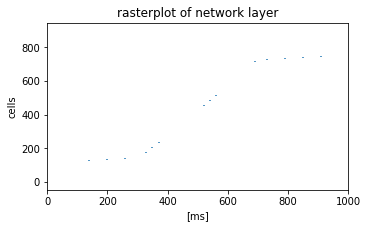

In [10]:
spike_times = [[]]*sizePop
for idx, value in enumerate(actualSources):
    spike_times[value] = [10*idx + 100] # compute the spike timing in relation to the selected cells, 10ms each starting at 100ms

%matplotlib inline  
fig, axes = plt.subplots(1, 1)
fig.tight_layout(pad=5)
axes_list = fig.axes

for idx, value in enumerate(['network']):
    axes_list[idx].eventplot(spike_times)
    axes_list[idx].set_title('rasterplot of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('[ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(0, simtime)
#fig.show()

In [11]:
# make the thalamic input sources

thalamus = {}
thalamus['A'] = sim.Population(
                                sizePop,
                                sim.SpikeSourceArray(spike_times=spike_times),
                                structure=structure['2D']
                                )


In [12]:
# make the projection

projs = {}

projs['thal', 'cx'] = sim.Projection(
                                    thalamus['A'],
                                    cx['tot'] ,
                                    sim.OneToOneConnector(),
                                    synapse_type=sim.StaticSynapse(weight=0.1, delay=1),
                                    source=None,
                                    receptor_type='excitatory',
                                    space = space.Space(axes = 'xy'),
                                    label='thal->cx-e',
                                )



In [13]:
# run simulation

sim.run(simtime) 

1000.0

In [14]:
# save the results


outputs = {}

outputs['cx'] = cx['tot'].get_data()
for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
    cx['tot'].write_data(fileName + '_' + str(recording) + '.pkl')


In [18]:
# recover results function

def recover_results(outputs):
    results = {}
    for key in outputs.keys(): # to extract the name of the layer, e.g., Exc, Inh, Thalamus, etc  
        
        # to get voltage and conductances
        for analogsignal in outputs[key].segments[0].analogsignals:
            print(analogsignal.name)
            results[key, analogsignal.name] = analogsignal

        # to get spikes
        results[key, 'spikes'] = outputs[key].segments[0].spiketrains
    return results


In [19]:
# recover results

results = recover_results(outputs)
results.keys()

v
gsyn_inh
gsyn_exc


dict_keys([('cx', 'v'), ('cx', 'gsyn_inh'), ('cx', 'gsyn_exc'), ('cx', 'spikes')])

(0, 1000)

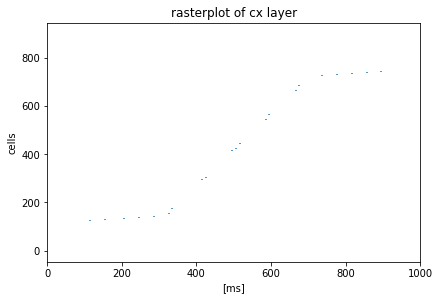

In [30]:
# check the spikes

%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize=(7,5))
fig.tight_layout(pad=5)
axes_list = fig.axes
idx = 0
axes_list[idx].eventplot(results['cx', 'spikes'])
axes_list[idx].set_title('rasterplot of cx layer')
axes_list[idx].set_xlabel('[ms]')
axes_list[idx].set_ylabel('cells')
axes_list[idx].set_xlim(0, simtime)
#fig.show()

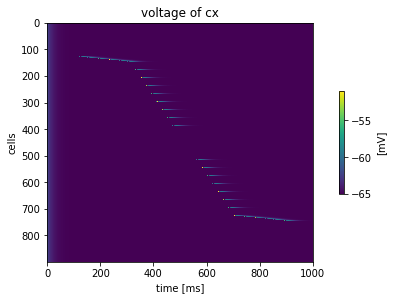

In [28]:
# check the voltage

%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize=(9,5))
fig.tight_layout(pad=5)
axes_list = fig.axes
im = axes_list[0].imshow(results['cx', 'v'].T)
axes_list[0].set_title('voltage of cx')
axes_list[0].set_xlabel('time [ms]')
axes_list[0].set_ylabel('cells')
fig.colorbar(im, ax=axes_list[0], fraction=0.010, label='[mV]')
#fig.show()



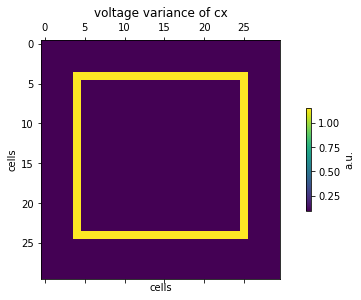

In [26]:
# plot votlage variance and reshape the 900 cells in a square of 30x30

var = []
for i in range(len(results['cx', 'v'].T)):
    var +=[np.var(results['cx', 'v'][:, i])]

%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize=(9,5))
fig.tight_layout(pad=5)
axes_list = fig.axes
im = axes_list[0].matshow(np.asarray(var).reshape(30,30))
axes_list[0].set_title('voltage variance of cx')
axes_list[0].set_xlabel('cells')
axes_list[0].set_ylabel('cells')
fig.colorbar(im, ax=axes_list[0], fraction=0.010, label='a.u.')
#fig.show()

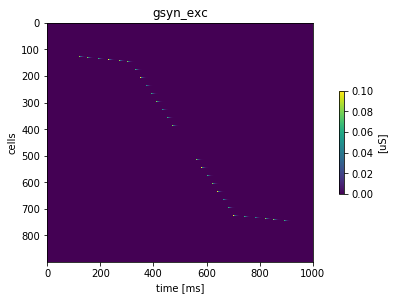

In [27]:
# check the conductances of cx
%matplotlib inline

for layer in ['cx']:
    fig, axes = plt.subplots(1, 1, figsize=(9,5))
    fig.tight_layout(pad=5)
    axes_list = fig.axes
    
    for idx, gsyn in enumerate(['gsyn_exc']):#, 'gsyn_inh']):
        im = axes_list[idx].imshow(results[layer, gsyn].T)
        axes_list[idx].set_title(str(gsyn))
        axes_list[idx].set_xlabel('time [ms]')
        axes_list[idx].set_ylabel('cells')
        fig.colorbar(im, ax=axes_list[idx], fraction=0.010, label='[uS]')
    #fig.show()

In [25]:
# end simulation

sim.end()